# Main Dashboard of PhD experiments in pre silicon (Subtests in SPEC2017) 

In [1]:
%matplotlib inline
results_file = 'presilicon_results.csv'
import os
#from pca.analytics import *
from pca.pca import *
from pre_silicon.presi_data_gen import *
from clustering.distortion import *
from clustering.clustering import *
from clustering.cluster_score import *

# Characterization of worklaods based on instructions kind

,arithmetic,branch,store,load,vector,io,other
603.bwaves_s,0.214103,0.092016,0.271172,0.016615,0.106039,0.000026,0.300029
605.mcf_s,0.185667,0.244650,0.307401,0.028369,0.001438,0.000097,0.232379
623.xalancbmk_s,0.164560,0.338984,0.259881,0.035792,0.001585,0.000104,0.199094
648.exchange2_s,0.293803,0.234526,0.253036,0.029110,0.002586,0.000087,0.186854
602.gcc_s,0.139242,0.331614,0.354894,0.021645,0.001176,0.000080,0.151349
620.omnetpp_s,0.158999,0.228904,0.358793,0.032200,0.001560,0.000102,0.219443
641.leela_s,0.193640,0.230884,0.289061,0.038251,0.001267,0.000086,0.246812
631.deepsjeng_s,0.220037,0.219782,0.315482,0.036175,0.003335,0.000086,0.205103
654.roms_s,0.109705,0.120846,0.154157,0.017975,0.055454,0.000046,0.541818
649.fotonik3d_s,0.130660,0.092347,0.191410,0.028079,0.090350,0.000049,0.467105


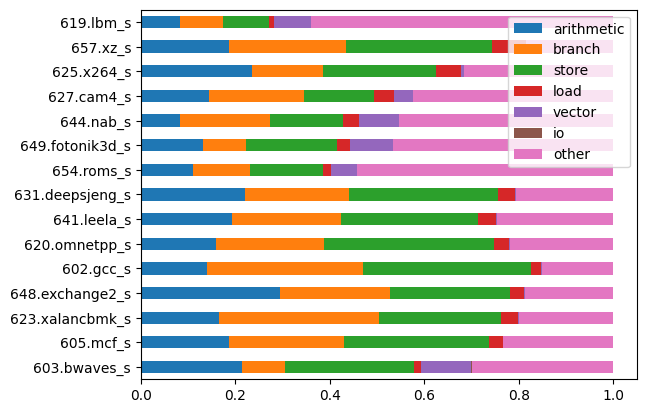

In [46]:
files = dir_list = os.listdir("pre_silicon/spec_experiments")
my_labels = ['arithmetic', 'branch', 'store', 'load', 'vector' , 'io', 'other']
df_global = pd.DataFrame(columns=my_labels)
for file_name in files:
    test_name = file_name.strip("csv").strip(".")
    df = read_histogram(os.path.join("pre_silicon/spec_experiments",file_name))
    df_sumary,_ = calculate_values(df)
    df_global.loc[test_name] = df_sumary['probability'].values.tolist()

display(df_global)
plot_stacked_bar(df_global)

df_global.reset_index(inplace=True)
df_global = df_global.rename(columns={"index": "test_name"} )

df_global.to_csv("presilicon_results_spec.csv")

## PCA

In [47]:


df = df_global

df_ = df.loc[:, df.columns != 'test_name']
df_ = (df_-df_.min())/(df_.max()-df_.min())
extracted_col = df["test_name"]
df_.insert(0, 'test_name', extracted_col)
df_.set_index('test_name')
df_.to_csv('normalized_speccpu_df.csv')
df = df_

features = list(df.columns)[1:]
test_column = list(df.columns)[0]

pca_df = get_PCA(df,features)

## Explained Variance

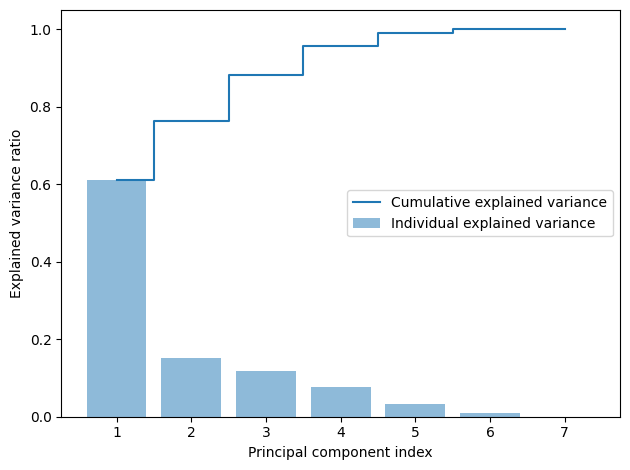

In [48]:
from pca.pca import *
x = get_features(df_global,features)
X_std = StandardScaler().fit_transform(x)
exp_var_pca = get_explained_variance(X_std)
plot_explained_variance(exp_var_pca)

,principal component 1,principal component 2,test_name,Kind
0,1.717071,0.249495,603.bwaves_s,0.0
1,-1.553686,-0.905483,605.mcf_s,1.0
2,-1.955245,-0.748060,623.xalancbmk_s,1.0
3,-1.833306,-0.231255,648.exchange2_s,1.0
4,-1.935329,-1.153988,602.gcc_s,1.0
5,-1.750390,-0.897356,620.omnetpp_s,1.0
6,-1.394915,-0.090958,641.leela_s,1.0
7,-1.709242,-0.116760,631.deepsjeng_s,1.0
8,2.706607,-0.487594,654.roms_s,0.0
9,2.503668,0.108426,649.fotonik3d_s,0.0


/var/folders/cq/r380vqnd7fd_v5hhy522gw140000gn/T/ipykernel_22461/1733950089.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_data['ID'] = merged_df.index


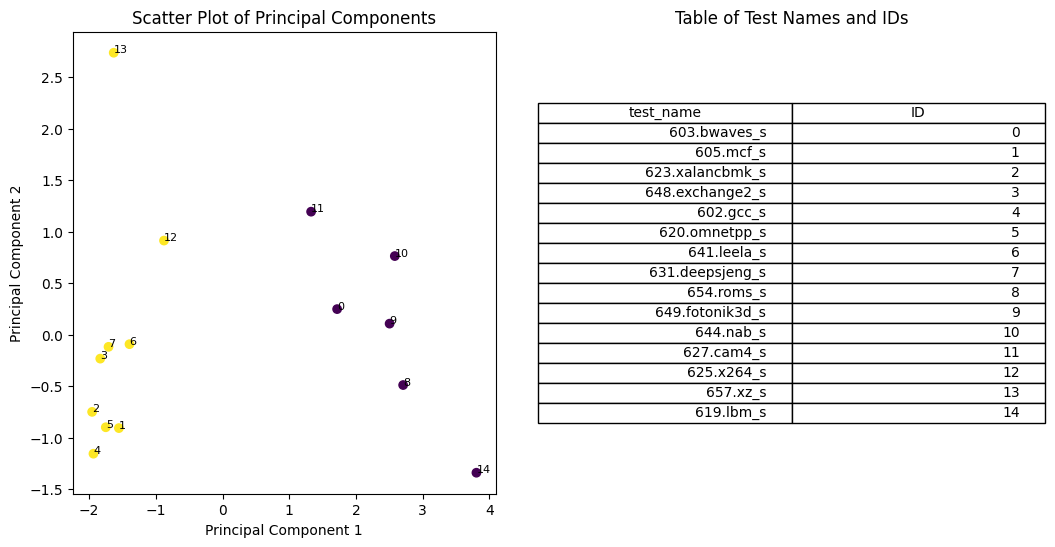

In [49]:
filename = 'post_silicon/summary_phd.csv'
df2 = pd.read_csv(filename)
df2.fillna(0,inplace=True)

merged_df = pca_df.merge(df2[['test_name', 'Kind']], on='test_name', how='left')

merged_df.loc[merged_df['test_name'] == '503.bwaves_r', 'Kind'] = 0
merged_df.loc[merged_df['test_name'] == '602.gcc_s', 'Kind'] = 1
merged_df.loc[merged_df['test_name'] == '627.cam4_s', 'Kind'] = 0


display(merged_df)
merged_df.to_csv("/tmp/merged_df.csv")

# Scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot
ax1.scatter(x='principal component 1', y='principal component 2', c='Kind', cmap='viridis', data=merged_df)
for i, label in enumerate(merged_df['test_name']):
    ax1.text(merged_df['principal component 1'][i], merged_df['principal component 2'][i], i, fontsize=8)
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.set_title("Scatter Plot of Principal Components")

# Table
table_data = merged_df[['test_name']]
table_data['ID'] = merged_df.index
table = ax2.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
ax2.axis('off')
ax2.set_title("Table of Test Names and IDs")

# Show plot
plt.show()
    
pca_df=merged_df

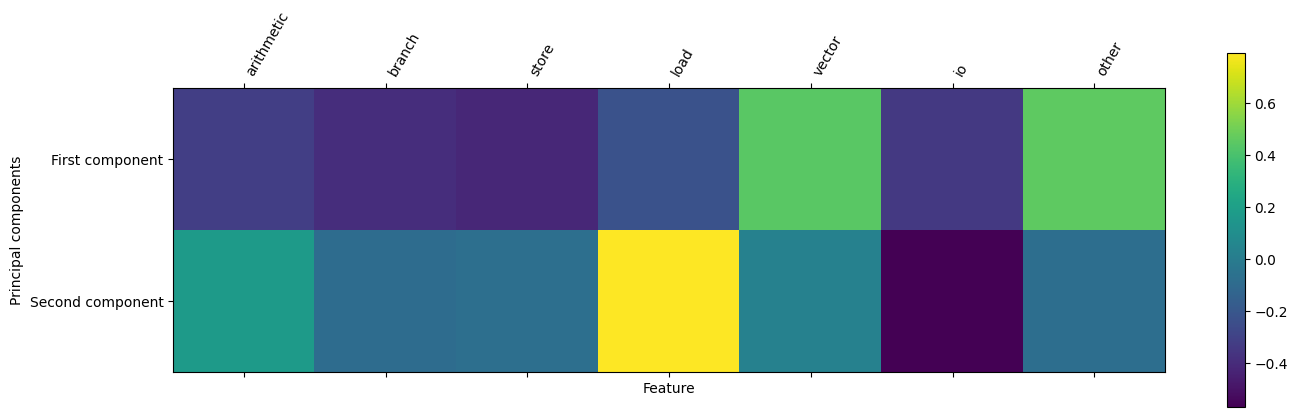

In [50]:
from pca.pca import *
plot_pca_vectors(X_std, features)

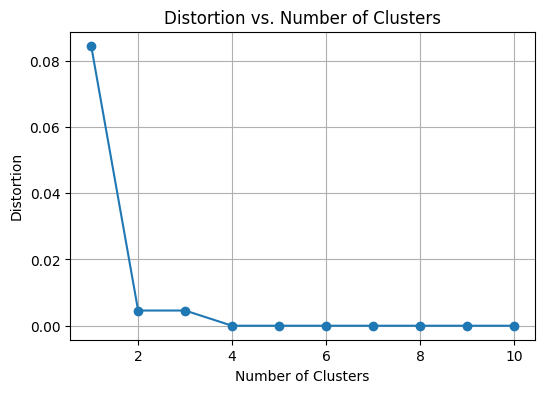

'Optimal number of clusters = 1'

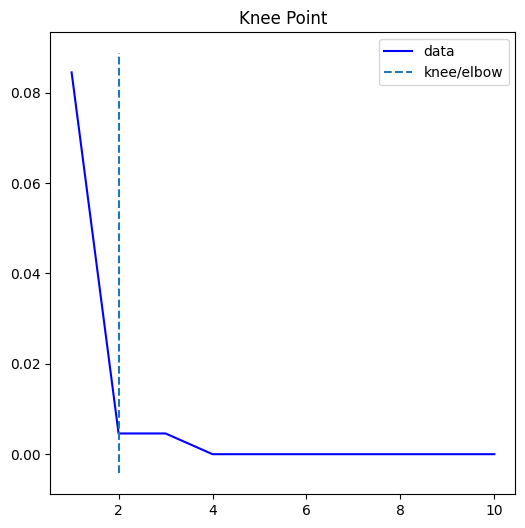

In [51]:
from clustering.distortion import *
from clustering.cluster_score import *
#clusters = calculate_elbow(pca_df)[0]
x1 = pca_df["principal component 1"].values
x2 = pca_df["principal component 2"].values
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
clusters,distortions,inertias = find_optimal_clusters(X, max_clusters=10)
display(f"Optimal number of clusters = {clusters}")

x = range(1, len(distortions)+1)
kn = KneeLocator(x, distortions, curve='convex', direction='decreasing')
kn.plot_knee()

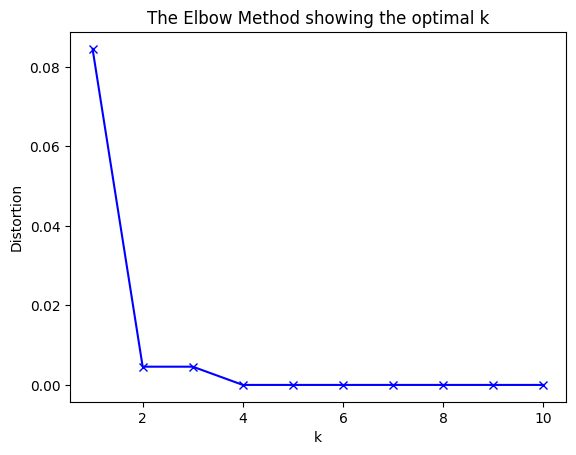

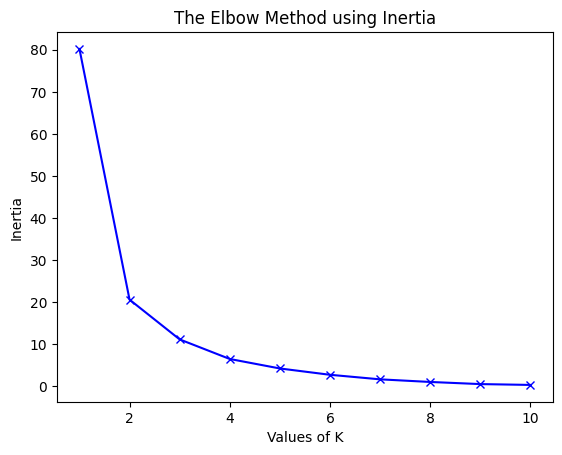

In [52]:
plot_elbow(range(1,11),distortions,inertias)


## Clasification based on 2 clusters number of clusters

,PRED,test_name
0,0,605.mcf_s
0,0,623.xalancbmk_s
0,0,648.exchange2_s
0,0,602.gcc_s
0,0,620.omnetpp_s
0,0,641.leela_s
0,0,631.deepsjeng_s
0,0,625.x264_s
0,0,657.xz_s
1,1,603.bwaves_s


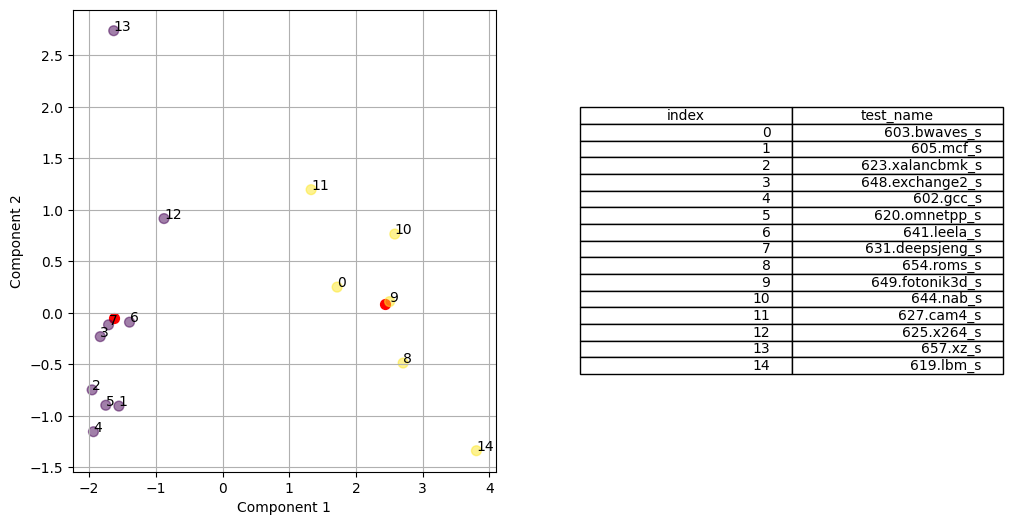

In [53]:
from clustering.clustering import *
df_result,kmeans,SSE = kmean_cluster(pca_df,2)
display(df_result)
plot_kmeans_improved(pca_df, kmeans)

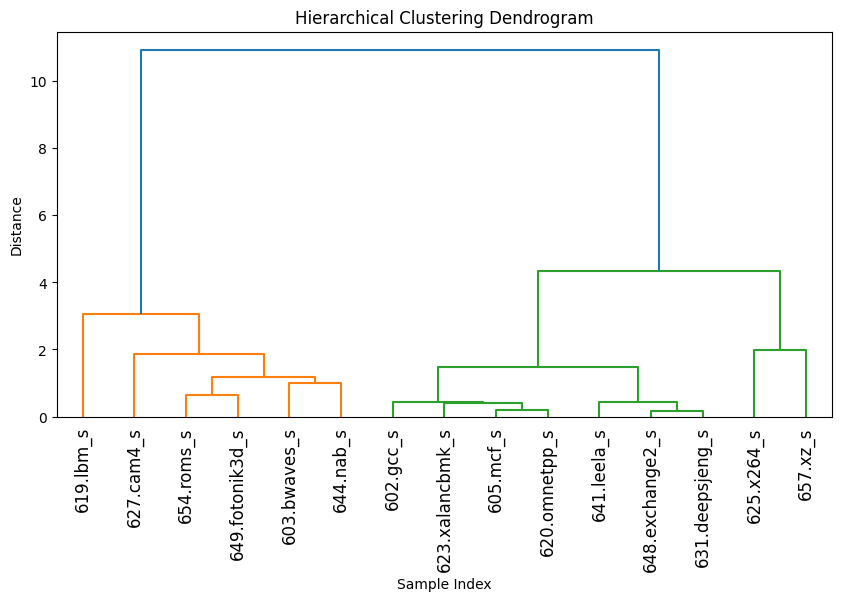

In [54]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = pca_df[['principal component 1', 'principal component 2']].copy()

# Perform hierarchical clustering to obtain the linkage matrix
Z = hierarchy.linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z,labels=pca_df['test_name'].values)

# Rotate the labels vertically
plt.xticks(rotation=90)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [55]:
list_workloads = pca_df['test_name'].values
# Generate random simulation time values between 1 and 20
simulation_times = np.random.randint(1, 21, size=len(pca_df))

# Add the new column to the DataFrame
pca_df['simulation_time'] = simulation_times
display(pca_df)
pca_df.to_csv("pca_df_sim_time.csv")

,principal component 1,principal component 2,test_name,Kind,simulation_time
0,1.717071,0.249495,603.bwaves_s,0.0,16
1,-1.553686,-0.905483,605.mcf_s,1.0,10
2,-1.955245,-0.748060,623.xalancbmk_s,1.0,8
3,-1.833306,-0.231255,648.exchange2_s,1.0,8
4,-1.935329,-1.153988,602.gcc_s,1.0,5
5,-1.750390,-0.897356,620.omnetpp_s,1.0,18
6,-1.394915,-0.090958,641.leela_s,1.0,10
7,-1.709242,-0.116760,631.deepsjeng_s,1.0,1
8,2.706607,-0.487594,654.roms_s,0.0,5
9,2.503668,0.108426,649.fotonik3d_s,0.0,11


In [56]:
#pca_df = pd.read_csv("pca_df_sim_time_fixed_time.csv")

## Get optimal set of of clusters based on simulation time vs SSE

[80.19552071945485, 20.582684631274265, 11.80905811303806, 6.472083710190079, 4.525499497629222, 2.71488982725041, 1.6321463625372112, 1.0082992287577244, 0.50191363274194]


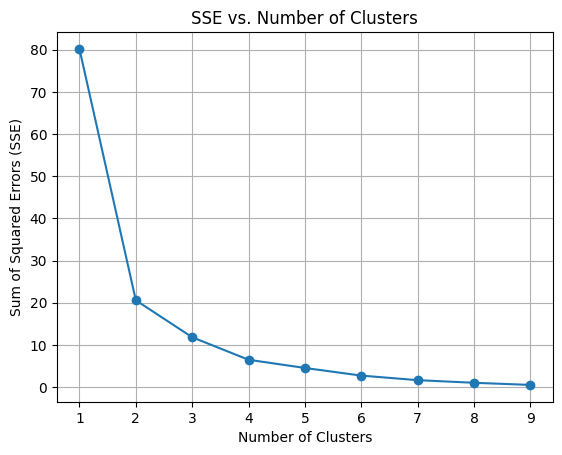

In [57]:
SSE_vector = []
for x in range(1,10):
    df_result_,kmeans,SSE = kmean_cluster(pca_df,x)
    SSE_vector.append(SSE)
print(SSE_vector)

# Plot SSE vs. number of clusters
plt.plot(range(1,10), SSE_vector, marker='o')
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


In [58]:
def find_min_simulation_time(df, workloads):
    # Filter the DataFrame based on the provided set of workloads
    filtered_df = df[df['test_name'].isin(workloads)]
    
    # Find the row with the minimum simulation time
    min_row = filtered_df.loc[filtered_df['simulation_time'].idxmin()]
    
    # Extract the workload name and minimum simulation time
    min_workload = min_row['test_name']
    min_time = min_row['simulation_time']
    
    return min_workload, min_time

total_clusters_time_v = []
for x in range(1,10):
    df_result_,kmeans,SSE = kmean_cluster(pca_df,x)
    workloads_per_cluster = {}
    total_clusters_time = 0
    for cluster, group in df_result_.groupby('PRED'):
        workloads = set(group['test_name'].unique())
        min_workload, min_time = find_min_simulation_time(pca_df, workloads)
        print(f"Workload with minimum simulation time: {min_workload}, Time: {min_time}")
        total_clusters_time += min_time
    print(f"Cluster size = {x} Sim time = {total_clusters_time}")
    total_clusters_time_v.append(total_clusters_time)
    
print(total_clusters_time_v)

Workload with minimum simulation time: 631.deepsjeng_s, Time: 1
Cluster size = 1 Sim time = 1
Workload with minimum simulation time: 631.deepsjeng_s, Time: 1
Workload with minimum simulation time: 654.roms_s, Time: 5
Cluster size = 2 Sim time = 6
Workload with minimum simulation time: 654.roms_s, Time: 5
Workload with minimum simulation time: 631.deepsjeng_s, Time: 1
Workload with minimum simulation time: 625.x264_s, Time: 11
Cluster size = 3 Sim time = 17
Workload with minimum simulation time: 654.roms_s, Time: 5
Workload with minimum simulation time: 631.deepsjeng_s, Time: 1
Workload with minimum simulation time: 625.x264_s, Time: 11
Workload with minimum simulation time: 619.lbm_s, Time: 9
Cluster size = 4 Sim time = 26
Workload with minimum simulation time: 631.deepsjeng_s, Time: 1
Workload with minimum simulation time: 654.roms_s, Time: 5
Workload with minimum simulation time: 625.x264_s, Time: 11
Workload with minimum simulation time: 619.lbm_s, Time: 9
Workload with minimum simu

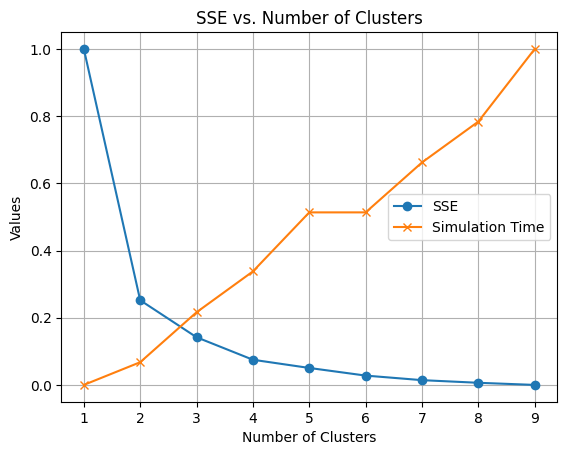

In [59]:
# Min-max normalization for total_clusters_time_v
min_total_clusters_time_v = min(total_clusters_time_v)
max_total_clusters_time_v = max(total_clusters_time_v)
normalized_total_clusters_time_v = [(x - min_total_clusters_time_v) / (max_total_clusters_time_v - min_total_clusters_time_v) for x in total_clusters_time_v]

# Min-max normalization for SSE_vector
min_SSE_vector = min(SSE_vector)
max_SSE_vector = max(SSE_vector)
normalized_SSE_vector = [(x - min_SSE_vector) / (max_SSE_vector - min_SSE_vector) for x in SSE_vector]

plt.plot(range(1, 10), normalized_SSE_vector, marker='o', label='SSE')
plt.plot(range(1, 10), normalized_total_clusters_time_v, marker='x', label='Simulation Time')
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

## Calculate Probaily 

,Test_Name,1,2,3,4,5,6,7,8,9,10
0,603.bwaves_s,0.321086,0.197454,0.188425,0.119396,0.043483,0.038228,0.027999,0.026931,0.020043,0.016954
1,605.mcf_s,0.407226,0.131988,0.124170,0.069195,0.052776,0.045222,0.044558,0.043270,0.040917,0.040678
2,623.xalancbmk_s,0.299079,0.166101,0.111653,0.097545,0.070711,0.059596,0.050398,0.049849,0.048544,0.046524
3,648.exchange2_s,0.318553,0.187945,0.098067,0.077468,0.073777,0.069592,0.054953,0.041720,0.040071,0.037855
4,602.gcc_s,0.398182,0.122224,0.110690,0.083794,0.065868,0.052578,0.049029,0.040674,0.040545,0.036418
5,620.omnetpp_s,0.419401,0.100353,0.091974,0.082098,0.053220,0.053104,0.051341,0.050863,0.050410,0.047234
6,641.leela_s,0.364899,0.108362,0.101348,0.085013,0.077616,0.062784,0.056872,0.053411,0.045565,0.044130
7,631.deepsjeng_s,0.403863,0.092893,0.087964,0.085889,0.079135,0.062834,0.053401,0.050693,0.045265,0.038063
8,654.roms_s,0.247360,0.215293,0.112127,0.100520,0.076497,0.066867,0.060287,0.046361,0.038183,0.036504
9,649.fotonik3d_s,0.251983,0.228382,0.130735,0.114374,0.079000,0.057186,0.040979,0.040048,0.032697,0.024617


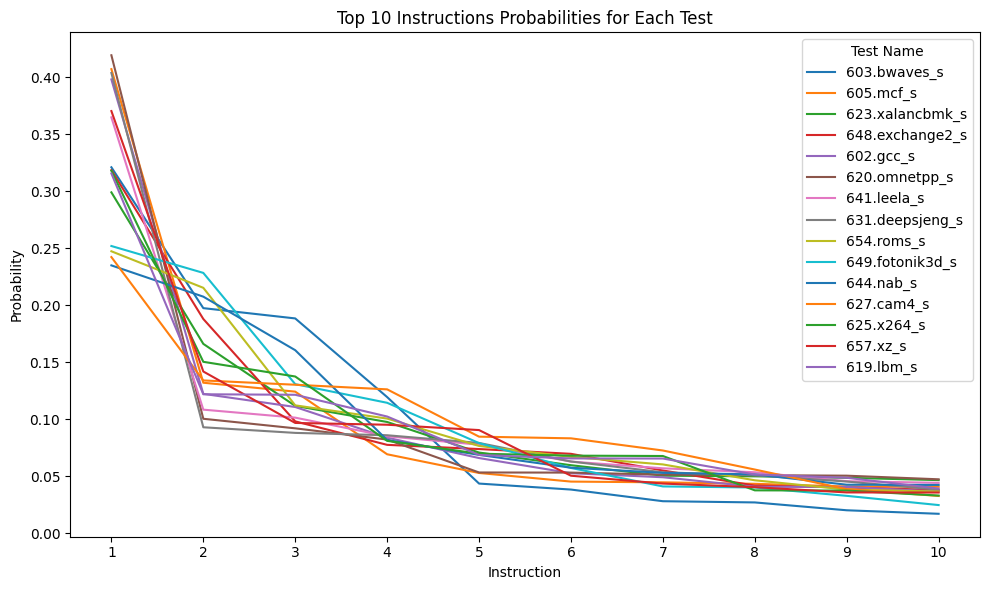

In [67]:
all_data = []

def calculate_probabilities(df):
    sorted_df = df.sort_values(by='count', ascending=False)
    top_counts = sorted_df.head(10)['count']
    total_count = top_counts.sum()
    probabilities = top_counts / total_count
    result = dict(zip(sorted_df.head(10)['mnemonic'], probabilities))
    return result

files = dir_list = os.listdir("pre_silicon/spec_experiments")
my_labels = ['arithmetic', 'branch', 'store', 'load', 'vector' , 'io', 'other']
for file_name in files:
    test_name = file_name.strip("csv").strip(".")
    df = read_histogram(os.path.join("pre_silicon/spec_experiments",file_name))
    probabilities = calculate_probabilities(df)
    # Extract the top 10 instructions and their probabilities
    top_instructions = list(probabilities.keys())[:10]
    prob_values = list(probabilities.values())[:10]
        
    # Append data to the list
    data_row = {'Test_Name': test_name}
    for i, prob_value in enumerate(prob_values, start=1):
        data_row[str(i)] = prob_value
    all_data.append(data_row)

# Create DataFrame from the collected data
df = pd.DataFrame(all_data)
display(df)

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each row (test) in the DataFrame
for index, row in df.iterrows():
    # Skip the 'Test_Name' column
    values = row.iloc[1:].astype(float)  # Start from index 1 to skip the 'Test_Name' column
    plt.plot(range(1, 11), values.values, label=index)

# Add labels and legend
plt.title('Top 10 Instructions Probabilities for Each Test')
plt.xlabel('Instruction')
plt.ylabel('Probability')
plt.xticks(range(1, 11))
plt.legend(title='Test Name', labels=df['Test_Name'].values)  # Use the 'Test_Name' column for legend labels
plt.tight_layout()
plt.show()

## Calculate entropy 

          Test_Name   Entropy
0      603.bwaves_s  3.813768
1         605.mcf_s  4.399439
2   623.xalancbmk_s  4.392385
3   648.exchange2_s  4.380596
4         602.gcc_s  4.219362
5     620.omnetpp_s  4.478594
6       641.leela_s  4.564368
7   631.deepsjeng_s  4.574804
8        654.roms_s  5.361080
9   649.fotonik3d_s  4.480163
10        644.nab_s  4.952151
11       627.cam4_s  5.652366
12       625.x264_s  4.915250
13         657.xz_s  4.218905
14        619.lbm_s  4.510092


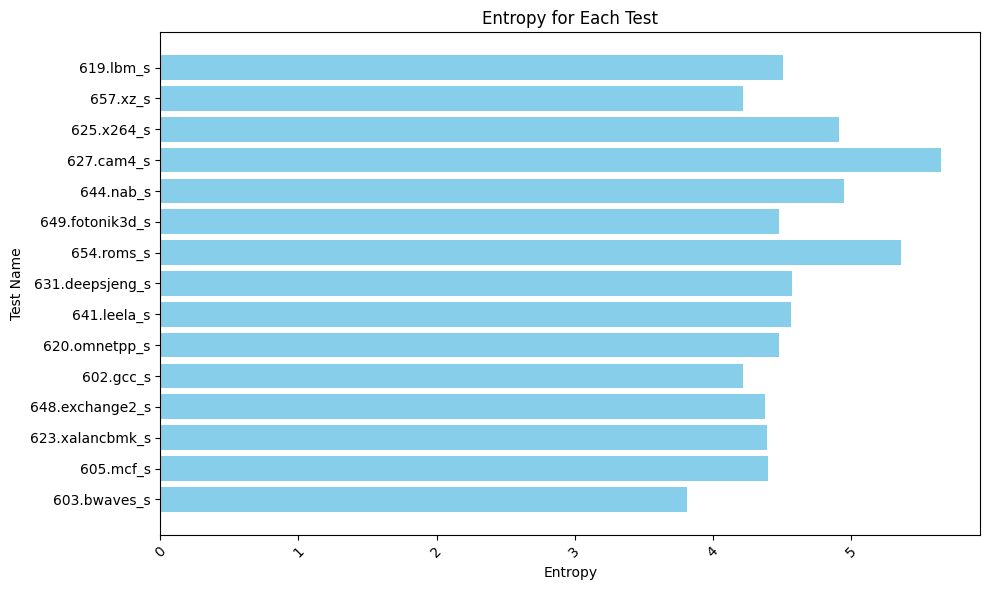

In [69]:
def calculate_probabilities(df):
    sorted_df = df.sort_values(by='count', ascending=False)
    top_counts = sorted_df['count']
    total_count = top_counts.sum()
    probabilities = top_counts / total_count
    result = dict(zip(sorted_df['mnemonic'], probabilities))
    return result

def calculate_entropy(df):
    entropy_total = 0
    # Initialize an empty list to store entropy values
    prob = calculate_probabilities(df)
    for instruction, prob_value in prob.items():
        if prob_value > 0.0:
            entropy = prob_value * np.log2(prob_value)
            entropy_total+=entropy
    return -(entropy_total)

# Initialize lists to store test names and entropy values
test_names = []
entropy_values = []

files = dir_list = os.listdir("pre_silicon/spec_experiments")
my_labels = ['arithmetic', 'branch', 'store', 'load', 'vector' , 'io', 'other']
for file_name in files:
    test_name = file_name.strip("csv").strip(".")
    df = read_histogram(os.path.join("pre_silicon/spec_experiments",file_name))
    entropy = calculate_entropy(df)
    # Append test name and entropy value to lists
    test_names.append(test_name)
    entropy_values.append(entropy)

# Create DataFrame
df_entropy = pd.DataFrame({'Test_Name': test_names, 'Entropy': entropy_values})

print(df_entropy)
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df_entropy['Test_Name'], df_entropy['Entropy'], color='skyblue')
plt.title('Entropy for Each Test')
plt.xlabel('Entropy')
plt.ylabel('Test Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Workload with minimum simulation time: 631.deepsjeng_s, Time: 1, Entropy: 4.574804418891733 
Cluster size = 1 Sim time = 1 Mean Entropy = 4.574804418891733
Workload with minimum simulation time: 654.roms_s, Time: 5, Entropy: 5.361080137816664 
Workload with minimum simulation time: 631.deepsjeng_s, Time: 1, Entropy: 4.574804418891733 
Cluster size = 2 Sim time = 6 Mean Entropy = 4.967942278354199
Workload with minimum simulation time: 625.x264_s, Time: 11, Entropy: 4.915250310580786 
Workload with minimum simulation time: 654.roms_s, Time: 5, Entropy: 5.361080137816664 
Workload with minimum simulation time: 631.deepsjeng_s, Time: 1, Entropy: 4.574804418891733 
Cluster size = 3 Sim time = 17 Mean Entropy = 4.9503782890963945
Workload with minimum simulation time: 625.x264_s, Time: 11, Entropy: 4.915250310580786 
Workload with minimum simulation time: 654.roms_s, Time: 5, Entropy: 5.361080137816664 
Workload with minimum simulation time: 631.deepsjeng_s, Time: 1, Entropy: 4.574804418891

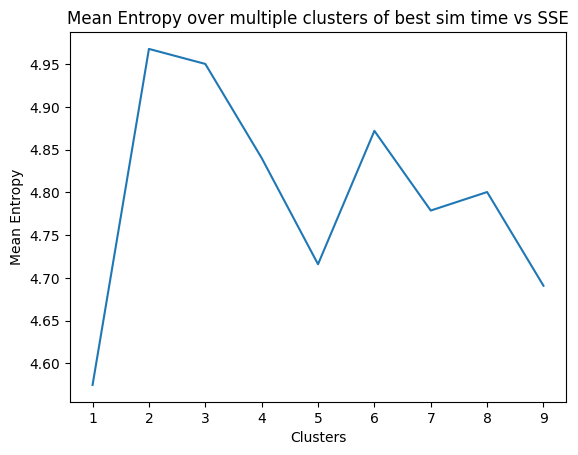

In [71]:
def find_min_simulation_time(df, workloads):
    # Filter the DataFrame based on the provided set of workloads
    filtered_df = df[df['test_name'].isin(workloads)]
    
    # Find the row with the minimum simulation time
    min_row = filtered_df.loc[filtered_df['simulation_time'].idxmin()]
    
    # Extract the workload name and minimum simulation time
    min_workload = min_row['test_name']
    min_time = min_row['simulation_time']
    
    return min_workload, min_time

total_clusters_time_v = []
mean_entropy_list = []
for x in range(1,10):
    df_result_,kmeans,SSE = kmean_cluster(pca_df,x)
    workloads_per_cluster = {}
    total_clusters_time = 0
    total_entropy = 0
    for cluster, group in df_result_.groupby('PRED'):
        workloads = set(group['test_name'].unique())
        min_workload, min_time = find_min_simulation_time(pca_df, workloads)
        entropy = df_entropy[df_entropy['Test_Name'] == min_workload]['Entropy'].iloc[0]
        total_entropy += entropy
        print(f"Workload with minimum simulation time: {min_workload}, Time: {min_time}, Entropy: {entropy} ")
        mean_entropy = total_entropy/x
        total_clusters_time += min_time
    mean_entropy_list.append(mean_entropy)
    print(f"Cluster size = {x} Sim time = {total_clusters_time} Mean Entropy = {mean_entropy}")
    total_clusters_time_v.append(total_clusters_time)

    
# Plot the list
# Define x-values starting from 1
x_values = range(1, len(mean_entropy_list) + 1)
# Plot the list with custom x-values
plt.plot(x_values, mean_entropy_list)
plt.xlabel('Clusters')
plt.ylabel('Mean Entropy')
plt.title('Mean Entropy over multiple clusters of best sim time vs SSE')
plt.show()

# Get the test cases closer to centroid

In [60]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df_ = pd.read_csv("pca.csv")
df = pca_df_.iloc[closest]
df

,Unnamed: 0,principal component 1,principal component 2,test_name
0,0,1.717071,0.249495,603.bwaves_s
7,7,-1.709242,-0.116760,631.deepsjeng_s
13,13,-1.631517,2.738054,657.xz_s
14,14,3.804972,-1.338733,619.lbm_s
5,5,-1.750390,-0.897356,620.omnetpp_s
8,8,2.706607,-0.487594,654.roms_s
12,12,-0.877578,0.914666,625.x264_s
11,11,1.327153,1.195149,627.cam4_s
10,10,2.581737,0.764397,644.nab_s


,test_name,arithmetic,branch,store,load,vector,io,other
0,603.bwaves_s,0.214103,0.092016,0.271172,0.016615,0.106039,0.000026,0.300029
5,620.omnetpp_s,0.158999,0.228904,0.358793,0.032200,0.001560,0.000102,0.219443
7,631.deepsjeng_s,0.220037,0.219782,0.315482,0.036175,0.003335,0.000086,0.205103
8,654.roms_s,0.109705,0.120846,0.154157,0.017975,0.055454,0.000046,0.541818
10,644.nab_s,0.082096,0.192027,0.153451,0.034587,0.084686,0.000023,0.453130
11,627.cam4_s,0.143531,0.201971,0.147190,0.043940,0.039784,0.000035,0.423550
12,625.x264_s,0.234761,0.151809,0.238462,0.052384,0.006350,0.000085,0.316149
13,657.xz_s,0.186275,0.248827,0.308939,0.071790,0.000520,0.000034,0.183615
14,619.lbm_s,0.082976,0.091433,0.097800,0.009215,0.078370,0.000063,0.640142


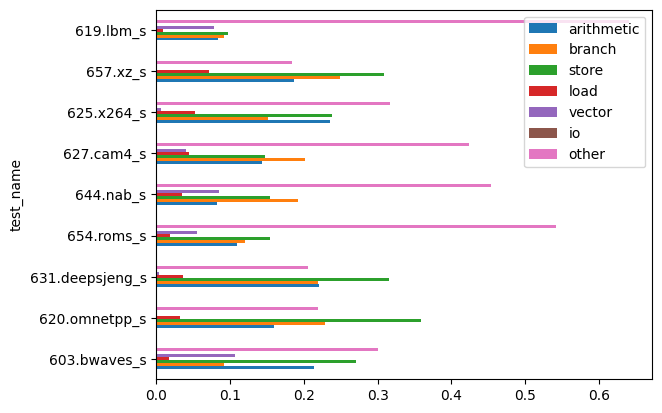

In [61]:
list_tests = df['test_name'].tolist()
df2 = df_global[df_global['test_name'].isin(list_tests)]
df2.plot.barh(x="test_name")
df2

### Automatic label of clusters based cosine similarity to FP/INT


\begin{equation}
\cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} }
\end{equation}

,Unnamed: 0,principal component 1,principal component 2,test_name,Kind,simulation_time
0,0,-2.026623,0.597176,redis_memtier_4cpu,1,77
1,1,0.720825,-2.018397,resnet50_int8,0,169
2,2,0.924069,-1.910955,resnet50_fp32,0,201
3,3,-2.232027,1.296451,redis_memtier_12cpu,1,11
4,4,-2.227643,1.471389,redis_memtier_16cpu,1,13
5,5,-1.520603,-0.622840,redis_memtier_2cpu_gated,1,112
6,6,-2.150937,1.062229,redis_memtier_8cpu,1,9
7,7,-0.488707,-1.152886,benchdnn_bf16,0,69
8,8,3.192015,0.281263,resnet101_throughput_avx_fp32,0,65
9,9,3.141067,0.300766,resnet101_throughput_amx_fp32,0,32


,PRED,test_name
0,0,605.mcf_s
0,0,623.xalancbmk_s
0,0,648.exchange2_s
0,0,602.gcc_s
0,0,620.omnetpp_s
0,0,641.leela_s
0,0,631.deepsjeng_s
0,0,625.x264_s
0,0,657.xz_s
1,1,603.bwaves_s



A = PRED -> 0
cosine_similarity vs fp_tests 0.0
cosine_similarity vs int_tests 0.0
cosine_similarity_int > cosine_similarity_fp
Assigining 1 label to pred cluster

B = PRED -> 1
cosine_similarity vs fp_tests 0.0
cosine_similarity vs int_tests 0.0
cosine_similarity_int > cosine_similarity_fp
Assigining 1 label to pred cluster


ValueError: All arrays must be of the same length

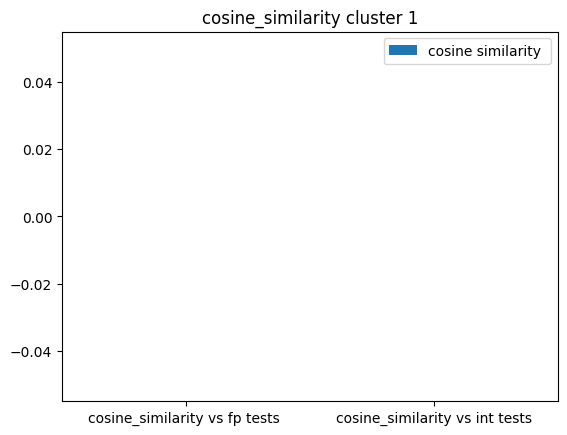

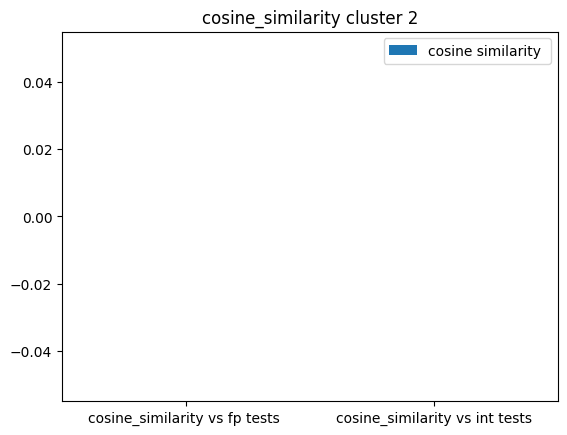

In [27]:
display(pca_df)
df_sorted = pca_df.sort_values(by='Kind')
fp_tests = df_sorted[df_sorted['Kind'] == 0]
int_tests = df_sorted[df_sorted['Kind'] == 1]

df = df_result
display(df)
df_sorted = df.sort_values(by='PRED')
A = df_sorted[df_sorted['PRED'] == 0]
B = df_sorted[df_sorted['PRED'] == 1]

C = normalize(A,B,fp_tests,int_tests)
C_sorted =  C.sort_values(by='test_name', ascending=False)

REAL = pca_df
REAL_sorted = REAL.sort_values(by='test_name', ascending=False)

labels_pred = C_sorted["PRED"].tolist()
labels_pred_ = [eval(i) for i in labels_pred]
labels_pred = labels_pred_

labels_true = REAL_sorted["Kind"].tolist()

df = pd.DataFrame({'labels':C_sorted['test_name'], 'val_pred':labels_pred, 'val_true':labels_true})
display(df)
df.to_csv("clusters.csv")

print()
df_ = df.loc[~(df['val_pred'] == df['val_true'])]
display(df_)

ax = df.plot.barh(x='labels', y=['val_pred','val_true'],  rot=0, title= "Cluster 0: FP / 1: INT")

scores_result = scores(labels_true,labels_pred)

df = pd.DataFrame({'scores':['adjusted_rand_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score'], 'val':scores_result[:-1]})
ax = df.plot.barh(x='scores', y='val', rot=0, title= "Scores (HIB)")

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

df = pd.read_csv('clusters.csv')
display(df)
actual = df['val_true'].tolist()
predicted = df['val_pred'].tolist()

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['FP', 'INT'])

cm_display.plot()
plt.show()

### Decision Tree Algorithm


In [22]:
display(pca_df)
# Use known kind based on KMEANS prediction
X = pca_df[["principal component 1","principal component 2"]]
y = pca_df[["Kind"]]

accuracy_results = {}

,Unnamed: 0,principal component 1,principal component 2,test_name,Kind,simulation_time
0,0,-2.026623,0.597176,redis_memtier_4cpu,1,77
1,1,0.720825,-2.018397,resnet50_int8,0,169
2,2,0.924069,-1.910955,resnet50_fp32,0,201
3,3,-2.232027,1.296451,redis_memtier_12cpu,1,11
4,4,-2.227643,1.471389,redis_memtier_16cpu,1,13
5,5,-1.520603,-0.622840,redis_memtier_2cpu_gated,1,112
6,6,-2.150937,1.062229,redis_memtier_8cpu,1,9
7,7,-0.488707,-1.152886,benchdnn_bf16,0,69
8,8,3.192015,0.281263,resnet101_throughput_avx_fp32,0,65
9,9,3.141067,0.300766,resnet101_throughput_amx_fp32,0,32


In [23]:
from statistics import mean
from statistics import stdev
def get_accuracty(X,y,loops,clf):
    p_total = []
    r_total = []
    f_total = []

    for i in range(loops):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        clf.fit(X_train,y_train)

        # Predict Accuracy Score
        y_pred = clf.predict(X_test)
        p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=y_pred,zero_division=1)
        p_total.append(p)
        r_total.append(r)
        f_total.append(f)
    return p_total,r_total,f_total


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# Split into training and test set
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

loops = 10
clf = DecisionTreeClassifier()
p_total_wpca,r_total_wpca,f_total_wpca = get_accuracty(X,y,loops,clf)
    
print(f"Precision score {mean(p_total_wpca)} STED {stdev(p_total_wpca)}")
print(f"Recall score {mean(r_total_wpca)} STED {stdev(p_total_wpca)}")
print(f"F-beta score {mean(f_total_wpca)} STED {stdev(p_total_wpca)}")

accuracy_results['Decision_Tree_precision_score_wpca'] = mean(p_total_wpca)
accuracy_results['Decision_Tree_recall_score_wpca'] = mean(r_total_wpca)
accuracy_results['Decision_Tree_F_score_wpca'] = mean(f_total_wpca)

Precision score 1.0 STED 0.0
Recall score 1.0 STED 0.0
F-beta score 1.0 STED 0.0


### Decision Tree Algorithm w/o PCA


In [24]:
from statistics import mean
from statistics import stdev

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

loops = 10
clf = DecisionTreeClassifier()

filename = 'normalized_speccpu_df.csv'
df_data = pd.read_csv(filename)
df_data.fillna(0,inplace=True)

if os.path.exists(filename):
    df = pd.read_csv(filename)
    filename = 'post_silicon/summary_phd.csv'
    df2 = pd.read_csv(filename)
    df2.fillna(0,inplace=True)

    merged_df = df_data.merge(df2[['test_name', 'Kind']], on='test_name', how='left')
    merged_df.loc[merged_df['test_name'] == '503.bwaves_r', 'Kind'] = 0
    merged_df.loc[merged_df['test_name'] == '602.gcc_s', 'Kind'] = 1  
    merged_df.loc[merged_df['test_name'] == '627.cam4_s', 'Kind'] = 0

    features = list(df.columns)[2:]
    display(merged_df)
    test_column = list(merged_df.columns)[0]
    x = merged_df.loc[:, features].values
    X_std = StandardScaler().fit_transform(x)
    y = merged_df['Kind']

p_total,r_total,f_total = get_accuracty(x,y,loops,clf)
    
print(f"Precision score {mean(p_total)} STED {stdev(p_total)}")
print(f"Recall score {mean(r_total)} STED {stdev(p_total)}")
print(f"F-beta score {mean(f_total)} STED {stdev(p_total)}")

accuracy_results['Decision_Tree_precision_score'] = mean(p_total)
accuracy_results['Decision_Tree_recall_score'] = mean(r_total)
accuracy_results['Decision_Tree_F_score'] = mean(f_total)

,Unnamed: 0,test_name,arithmetic,branch,store,load,vector,io,other,Kind
0,0,603.bwaves_s,0.623536,0.002356,0.664276,0.118252,1.000000,0.036808,0.304177,0.0
1,1,605.mcf_s,0.489218,0.618930,0.803090,0.306091,0.008699,0.921407,0.165774,1.0
2,2,623.xalancbmk_s,0.389521,1.000000,0.621017,0.424725,0.010087,1.000000,0.097680,1.0
3,3,648.exchange2_s,1.000000,0.578034,0.594788,0.317932,0.019573,0.788883,0.072637,1.0
4,4,602.gcc_s,0.269930,0.970230,0.985059,0.198639,0.006213,0.707232,0.000000,1.0
5,5,620.omnetpp_s,0.363251,0.555323,1.000000,0.367308,0.009855,0.978155,0.139310,1.0
6,6,641.leela_s,0.526881,0.563323,0.732820,0.464009,0.007074,0.777063,0.195302,1.0
7,7,631.deepsjeng_s,0.651569,0.518473,0.834051,0.430840,0.026677,0.781816,0.109972,1.0
8,8,654.roms_s,0.130412,0.118816,0.215932,0.139983,0.520606,0.280150,0.798842,0.0
9,9,649.fotonik3d_s,0.229394,0.003690,0.358668,0.301455,0.851317,0.323458,0.645990,0.0


Precision score 0.8666666666666667 STED 0.14272480642961255
Recall score 0.9 STED 0.14272480642961255
F-beta score 0.8466666666666667 STED 0.14272480642961255


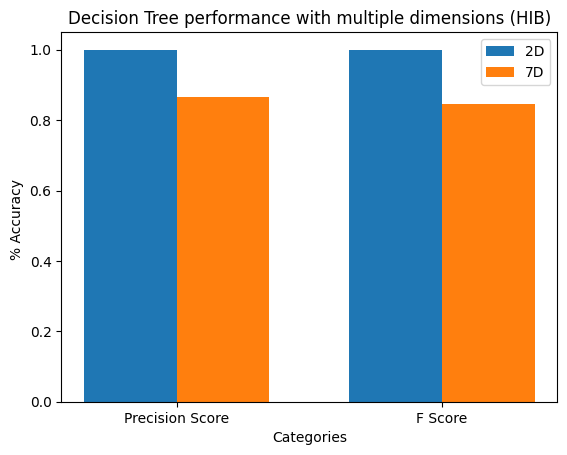

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
from statistics import stdev

# Sample data for dataframe 1
data1 = {'Category': ['Precision Score', 'F Score'],
         '2D': [mean(p_total_wpca), mean(f_total_wpca)]}
df1 = pd.DataFrame(data1)

# Sample data for dataframe 2
data2 = {'Category': ['Precision Score', 'F Socre'],
         '7D': [mean(p_total), mean(f_total)]}
df2 = pd.DataFrame(data2)

# Create the figure and subplot
fig, ax = plt.subplots()

# Plotting bars for dataframe 1
width = 0.35
x = range(len(df1['Category']))
ax.bar(x, df1['2D'], width, label='2D')

# Plotting bars for dataframe 2 next to the bars from dataframe 1
ax.bar([i + width for i in x], df2['7D'], width, label='7D')

# Customize the plot
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(df1['Category'])
ax.set_xlabel('Categories')
ax.set_ylabel('% Accuracy ')
ax.set_title('Decision Tree performance with multiple dimensions (HIB)')
ax.legend()

# Show the plot
plt.show()

,algorithm,accuracy
0,Decision_Tree_precision_score_wpca,1.000000
1,Decision_Tree_recall_score_wpca,1.000000
2,Decision_Tree_F_score_wpca,1.000000
3,Decision_Tree_precision_score,0.866667
4,Decision_Tree_recall_score,0.900000
5,Decision_Tree_F_score,0.846667


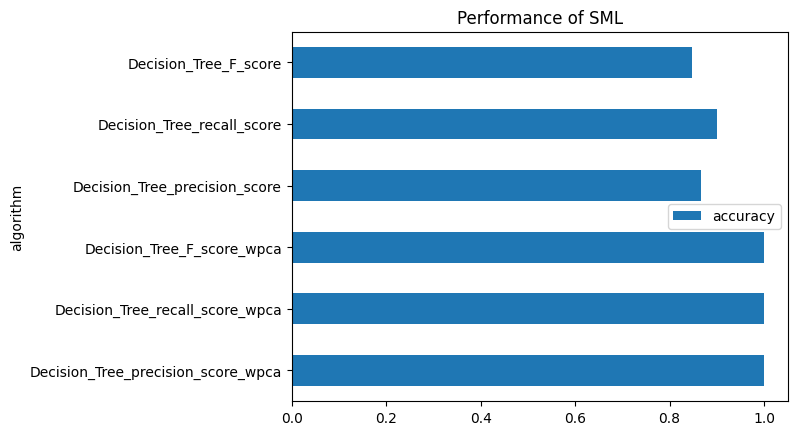

In [26]:
accuracy_results_df = pd.DataFrame(list(accuracy_results.items()),columns=['algorithm','accuracy'])
display(accuracy_results_df)
#ccuracy_results_df = accuracy_results_df.drop([0,2])
#isplay(accuracy_results_df)
accuracy_results_df.plot.barh(x='algorithm', title = 'Performance of SML');